In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

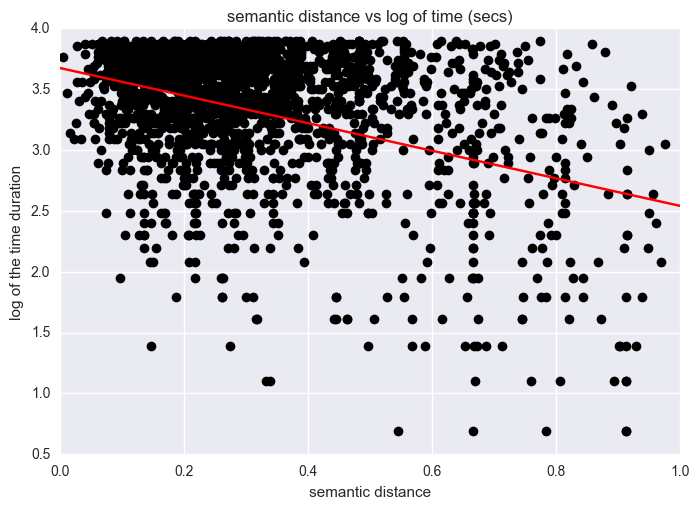

0.122981732558


In [11]:
semantic_data = pd.read_csv("../task-data/data_with_semantics_all_columns_100d.csv")
semantic_data.drop("Unnamed: 0", axis=1, inplace=True) #remove weird column

X_semantic_data = semantic_data.loc[semantic_data['durationInSec'] < 50]
y_duration   = X_semantic_data['durationInSec']
X_semantic_data = X_semantic_data['semantic_length']

# X_train, X_test, y_train, y_test = train_test_split(X_semantic_data, 
#                                              y_pathlength, test_size=0.2, random_state=42)

# X_train = X_train.reshape((X_train.shape[0], 1))
# X_test  = X_test.reshape((X_test.shape[0], 1))
# y_pl_train = y_pl_train.reshape((y_pl_train.shape[0], 1))
# y_pl_test  = y_pl_test.reshape((y_pl_test.shape[0], 1))

X_train, X_test, y_train, y_test = train_test_split(X_semantic_data, y_duration, 
                                                    test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], 1))
X_test  = X_test.reshape((X_test.shape[0], 1))
y_train = y_train.reshape((y_train.shape[0], 1))
y_test  = y_test.reshape((y_test.shape[0], 1))


path_LR = LinearRegression(fit_intercept=True, normalize=True)
path_LR.fit(X_train, np.log(y_train))

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(X_test, np.log(y_test),'ko')
axes.set_xlabel("semantic distance")
axes.set_ylabel("log of the time duration")
axes.set_title("semantic distance vs log of time (secs)")
N = 100
x = np.linspace(0,1,N)
y = path_LR.coef_ * x + path_LR.intercept_

axes.plot(x, y.reshape((N)), 'r-')
plt.show()

print path_LR.score(X_test, np.log(y_test))




In [106]:
semantic_data.head()

,durationInSec,source,target,opt_path_length,pathlength,semantic_length
0,166,14th_century,African_slave_trade,3,9,0.970446
1,88,14th_century,African_slave_trade,3,5,0.970446
2,138,14th_century,African_slave_trade,3,8,0.970446
3,37,14th_century,Greece,2,4,0.996142
4,175,14th_century,John_F._Kennedy,3,7,0.970360


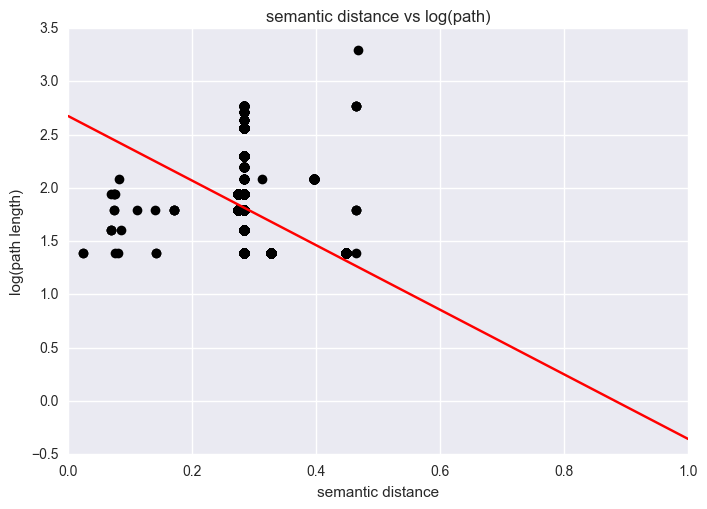

0.179646630805


In [16]:
semantic_data = pd.read_csv("../task-data/data_with_semantics_all_columns_100d.csv")
semantic_data.drop("Unnamed: 0", axis=1, inplace=True) #remove weird column

X_semantic_data = semantic_data.loc[semantic_data['pathlength']]
y_pl   = X_semantic_data['pathlength']
X_semantic_data = X_semantic_data['semantic_length']

# X_train, X_test, y_train, y_test = train_test_split(X_semantic_data, 
#                                              y_pathlength, test_size=0.2, random_state=42)

# X_train = X_train.reshape((X_train.shape[0], 1))
# X_test  = X_test.reshape((X_test.shape[0], 1))
# y_pl_train = y_pl_train.reshape((y_pl_train.shape[0], 1))
# y_pl_test  = y_pl_test.reshape((y_pl_test.shape[0], 1))

X_train, X_test, y_train, y_test = train_test_split(X_semantic_data, y_pl, 
                                                    test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], 1))
X_test  = X_test.reshape((X_test.shape[0], 1))
y_train = y_train.reshape((y_train.shape[0], 1))
y_test  = y_test.reshape((y_test.shape[0], 1))

path_LR = LinearRegression(fit_intercept=True, normalize=True)
path_LR.fit(X_train, np.log(y_train))

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot( X_test, np.log(y_test), 'ko' )
axes.set_xlabel("semantic distance")
axes.set_ylabel("log(path length)")
axes.set_title("semantic distance vs log(path)")
N = 100
x = np.linspace(0,1,N)
y = path_LR.coef_ * x + path_LR.intercept_

axes.plot(x, y.reshape((N)) , 'r-')
plt.show()

print path_LR.score(X_test, np.log(y_test))

potential hidden path that doesnt make sense intuitvely

find an example 

human intuition from category to category
